In [69]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [70]:
import h5py
start_db = h5py.File('../imaging_post_processing/start_db.hdf5','r')
stop_db = h5py.File('../imaging_post_processing/stop_db.hdf5','r')

In [71]:
def kill_spines(top = True,bottom =True, left = True,right=True):
    if top:
        plb.gca().spines['top'].set_visible(False)
        #[x.set_visible(False) for x in plb.gca().get_xticklabels()]
        [x.set_visible(False) for x in plb.gca().get_xticklines()[1::2]]
    if right:
        plb.gca().spines['right'].set_visible(False)
        #[y.set_visible(False) for y in plb.gca().get_yticklabels()]
        [y.set_visible(False) for y in plb.gca().get_yticklines()[1::2]]
    if left:
        plb.gca().spines['left'].set_visible(False)
        [y.set_visible(False) for y in plb.gca().get_yticklabels()]
        [y.set_visible(False) for y in plb.gca().get_yticklines()[::2]]
    if bottom:
        plb.gca().spines['bottom'].set_visible(False)
        [x.set_visible(False) for x in plb.gca().get_xticklabels()]
        [x.set_visible(False) for x in plb.gca().get_xticklines()[::2]]
        

In [72]:
import group_data as gd
#fly = gd.swarms['GMR22H05'].flies[11]
#fly = gd.swarms['GMR22H05'].flies[8]
fly = gd.swarms['GMR22H05_pr'].flies[5]
#fly = gd.swarms['GMR22H05_pr'].flies[11]
fly.open_fly_record()
muscle_sigs = fly.get_pkl_data('nnls_fits_bk_sub_F.cpkl')
axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase']

In [73]:
import group_data as gd
start_dict = dict()
stop_dict = dict()
xi = np.linspace(0,23,1150)
swarm_name = 'GMR22H05'
swarm_name_ctrl = 'GMR22H05_GFP'
plot_sigs = ['Ph1','wb_frequency']
plot_sigs.extend(gd.muscle_plot_list)
#endidx = 22900

#muscle_list = ['wb_frequency','b1','b2','b3','i1','i2','iii1','iii24','iii3','hg1','hg2','hg3','hg4','tpd','tpv','ttm','pr']
for plot_sig in plot_sigs:
    start_dict[plot_sig] = dict()
    start_dict[plot_sig]['md'] = np.nanpercentile(np.array(start_db[swarm_name][plot_sig]),50,axis = 0)    
    start_dict[plot_sig]['ub'] = np.nanpercentile(np.array(start_db[swarm_name][plot_sig]),75,axis = 0)
    start_dict[plot_sig]['lb'] = np.nanpercentile(np.array(start_db[swarm_name][plot_sig]),25,axis = 0)
    start_dict[plot_sig]['md_GFP'] = np.nanpercentile(np.array(start_db[swarm_name_ctrl][plot_sig]),50,axis = 0)    
    start_dict[plot_sig]['ub_GFP'] = np.nanpercentile(np.array(start_db[swarm_name_ctrl][plot_sig]),75,axis = 0)
    start_dict[plot_sig]['lb_GFP'] = np.nanpercentile(np.array(start_db[swarm_name_ctrl][plot_sig]),25,axis = 0)
    
    
    
    stop_dict[plot_sig] = dict()
    stop_dict[plot_sig]['md'] = np.nanpercentile(np.array(stop_db[swarm_name][plot_sig]),50,axis = 0)
    stop_dict[plot_sig]['ub'] = np.nanpercentile(np.array(stop_db[swarm_name][plot_sig]),75,axis = 0)
    stop_dict[plot_sig]['lb'] = np.nanpercentile(np.array(stop_db[swarm_name][plot_sig]),25,axis = 0)
    stop_dict[plot_sig]['md_GFP'] = np.nanpercentile(np.array(stop_db[swarm_name_ctrl][plot_sig]),50,axis = 0)    
    stop_dict[plot_sig]['ub_GFP'] = np.nanpercentile(np.array(stop_db[swarm_name_ctrl][plot_sig]),75,axis = 0)
    stop_dict[plot_sig]['lb_GFP'] = np.nanpercentile(np.array(stop_db[swarm_name_ctrl][plot_sig]),25,axis = 0)
    
    

In [93]:
lookup_ybound = {'Ph1':(-90,90),
                 'Ph0':(-90,90),
                 'wb_frequency':(0,250),
                 'b1':(0.0,1.0),
                 'b2':(0.0,1.0),
                 'b3':(0.0,1.0),
                 'i1':(0.0,1.5),
                 'i2':(0.0,1.5),
                 'iii1':(0.0,4.0),
                 'iii3':(0.0,4.0),
                 'iii24':(0.0,4.0),
                 'hg1':(0.0,10.0),
                 'hg2':(0.0,10.0),
                 'hg3':(0.0,1.0),
                 'hg4':(0.0,1.0),
                 'tpd':(0.0,1.0),
                 'tpv':(0.0,1.0),
                 'ttm':(0.0,1.0),
                 'pr':(0.0,1.0)}

/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:198: RuntimeWarning: invalid value encountered in less
/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:212: RuntimeWarning: invalid value encountered in less
/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:308: RuntimeWarning: invalid value encountered in less
/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:323: RuntimeWarning: invalid value encountered in less


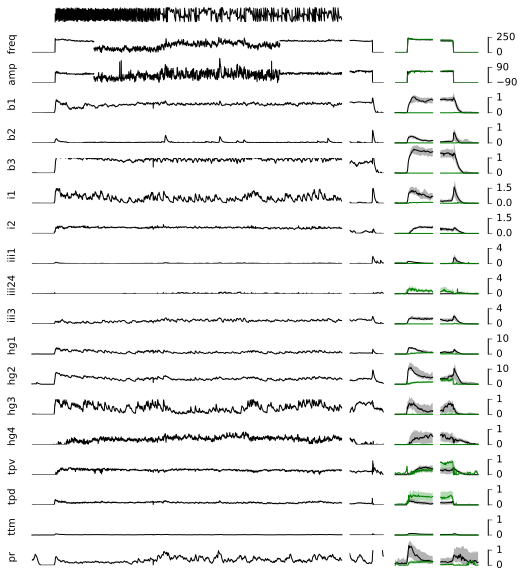

In [95]:
figure(figsize = (8,10))
gs = GridSpec(len(plot_sigs)+1,8+2)
fill_kwargs = {'alpha':0.3,'clip_on':False,'lw':0,'color':'k'}
fill_kwargs_GFP = {'alpha':0.3,'clip_on':False,'lw':0,'color':'g'}
xidx = [x for x in range(1,len(plot_sigs))]
rng = (xi>4) & (xi<7)

#endidx = 78200
endidx = 22900
scale = 2500

expanded_fraction = 0.60
expanded_samples = int(scale*expanded_fraction)
expanded_region = 200+(scale-expanded_samples)/2
expanded_region = [expanded_region, expanded_region+expanded_samples]


def add_right_scale(signal):
    gca().set_ybound(lookup_ybound[signal])
    plb.gca().spines['right'].set_visible(True)
    plb.gca().spines['right'].set_bounds(*lookup_ybound[signal])
    plb.gca().spines['right'].set_position(('outward', 10))
    [y.set_visible(True) for y in plb.gca().get_yticklines()[1::2]]
    [y.set_visible(True) for y in plb.gca().get_yticklabels()]
    plb.gca().yaxis.tick_right()
    plb.gca().get_yaxis().set_tick_params(direction='out')
    plb.yticks(lookup_ybound[signal])
    
#scale = 4000
#print 'here'
#figure(figsize = figsize)

###################################
## Plot example trace x-pos
###################################

subplot(gs[0,0:7])
plotsig = np.array(axon_sigs['Xpos'])
plotsig[np.array(axon_sigs['wb_frequency'])<150.0] = -90
plot(plotsig[200:200+scale],color = 'k');kill_spines()
gca().set_ybound(0,np.max(plotsig))
#print gca().get_ybound()

###################################
## Plot example trace - frequency
###################################


subplot(gs[0+1,0:7])
#create the expanded inset
plotsig = axon_sigs['wb_frequency']
plotsig_masked = np.array(axon_sigs['wb_frequency']).copy()
plotsig_masked[expanded_region[0]:expanded_region[1]] = np.nan
#plot the non-inset data
plot(plotsig_masked[200:200+scale],color = 'k');kill_spines()
#plot the inset data
plot(np.arange(expanded_region[0],expanded_region[1])-200,
                     plotsig[expanded_region[0]:expanded_region[1]]*5 - 
                     np.min(plotsig[expanded_region[0]:expanded_region[1]]*5),color = 'k',clip_on = False)

#plot a scale bar for the non-inset data
#plot([0,0], [0,200],color = 'k')
#plot a scale bar for the inset data
#plot([expanded_region[0]-200,expanded_region[0]-200],[0,50*4],color = 'k')

#gca().set_ybound(0,np.max(axon_sigs['wb_frequency']))
gca().set_ylabel('freq',labelpad=15)
gca().set_ybound(lookup_ybound['wb_frequency'])


###################################
## Plot example trace - amplitude 
###################################

subplot(gs[1+1,0:7])
plotsig = rad2deg(np.array(axon_sigs['Ph1'])/5.0)
#set amp where fly isn't flying to zero
plotsig[np.array(axon_sigs['wb_frequency'])<150.0] = -90
#create the expanded inset
plotsig_masked = plotsig.copy()
plotsig_masked[expanded_region[0]:expanded_region[1]] = np.nan
plot(plotsig_masked[200:200+scale],color = 'k');kill_spines()
plot(np.arange(expanded_region[0],expanded_region[1])-200,
                     plotsig[expanded_region[0]:expanded_region[1]]*5 - 
                     np.min(plotsig[expanded_region[0]:expanded_region[1]]*5) - 90,color = 'k',clip_on = False)


#print gca().get_ybound()

#plot a scale bar for the non-inset data
#plot([0,0], [-90,0],color = 'k')
#plot a scale bar for the inset data
#plot([expanded_region[0]-200,expanded_region[0]-200],[-10*4,0],color = 'k')

#gca().set_ybound(-90,np.max(plotsig))
gca().set_ylabel('amp',labelpad=15)
gca().set_ybound(lookup_ybound['Ph1'])

###################################
## Plot example trace - muscle sigs
###################################

for i,sig_key in enumerate(plot_sigs[2:]):
    subplot(gs[i+2+1,0:7])

    idx = find(np.array(muscle_sigs['muscles']) == sig_key)[0]
    sig = np.array(muscle_sigs['fits'][idx])

    plot(sig[200:200+scale],color = 'k')
    
    kill_spines()
    gca().set_ylabel(plot_sigs[i+2],labelpad=15)
    gca().set_ybound(lookup_ybound[sig_key])
    #gca().set_ybound(0,max(sig))
    
###################################
## Plot example trace - termination frequency
###################################

subplot(gs[0+1,7:8])
plot(axon_sigs['wb_frequency'][endidx-(scale/8):endidx],color = 'k');kill_spines()
#gca().set_ybound(0,np.max(axon_sigs['wb_frequency']))
gca().set_ybound(lookup_ybound['wb_frequency'])
    
###################################
## Plot example trace - termination amplitude
###################################

subplot(gs[1+1,7:8])
plotsig = rad2deg(np.array(axon_sigs['Ph1'])/5.0)
plotsig[np.array(axon_sigs['wb_frequency'])<150.0] = -90
plot(plotsig[endidx-(scale/8):endidx],color = 'k');kill_spines()
gca().set_ybound(lookup_ybound['Ph1'])
#gca().set_ybound(-90,np.max(plotsig))
#print gca().get_ybound()
#print np.array(gca().get_xbound())*xi[1]


##################################
## Plot example trace - termination muscle signals
###################################

for i,sig_key in enumerate(plot_sigs[2:]):
    subplot(gs[i+2+1,7:8])

    idx = find(np.array(muscle_sigs['muscles']) == sig_key)[0]
    sig = np.array(muscle_sigs['fits'][idx])

    plot(sig[endidx-(scale/8):endidx],color = 'k')
    gca().set_ybound(lookup_ybound[sig_key])
    kill_spines()

##################################
## Plot summary data  - frequency start
###################################

subplot(gs[0+1,0+8],alpha= 0.0)

ub = np.array(start_dict['wb_frequency']['ub'])
lb = np.array(start_dict['wb_frequency']['lb'])
md = np.array(start_dict['wb_frequency']['md'])

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
plot(xi[rng],md[rng],color = 'k')

#ctrls
ub = np.array(start_dict['wb_frequency']['ub_GFP'])
lb = np.array(start_dict['wb_frequency']['lb_GFP'])
md = np.array(start_dict['wb_frequency']['md_GFP'])

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs_GFP)
plot(xi[rng],md[rng],color = 'g')

#scalebar_x = [4,4]
#plot(scalebar_x,[0,deg2rad(20.0)*5.0],clip_on = False,color = 'k')

kill_spines()

gca().set_xbound(4,7)
gca().set_ybound(lookup_ybound['wb_frequency'])
#gca().set_ybound(0,max(hstack((start_dict[plot_sigs[0]]['ub'],
#                               start_dict[plot_sigs[0]]['ub_GFP'],
#                               stop_dict[plot_sigs[0]]['ub'],
#                               stop_dict[plot_sigs[0]]['ub_GFP'])
#                             )))


##################################
## Plot summary data  - amplitude start
###################################

subplot(gs[1+1,0+8],alpha= 0.0)

ub = rad2deg(np.array(start_dict['Ph1']['ub'])/5.0)
lb = rad2deg(np.array(start_dict['Ph1']['lb'])/5.0)
md = rad2deg(np.array(start_dict['Ph1']['md'])/5.0)

mask = (start_dict['wb_frequency']['ub']<50)

ub[mask] = -90.0
lb[mask] = -90.0
md[mask] = -90.0

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
plot(xi[rng],md[rng],color = 'k')

#ctrls
ub = rad2deg(np.array(start_dict['Ph1']['ub_GFP'])/5.0)
lb = rad2deg(np.array(start_dict['Ph1']['lb_GFP'])/5.0)
md = rad2deg(np.array(start_dict['Ph1']['md_GFP'])/5.0)

mask = (start_dict['wb_frequency']['ub_GFP']<50)

ub[mask] = -90.0
lb[mask] = -90.0
md[mask] = -90.0

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs_GFP)
plot(xi[rng],md[rng],color = 'g')

#scalebar_x = [4,4]
#plot(scalebar_x,[0,deg2rad(20.0)*5.0],clip_on = False,color = 'k')

kill_spines()

gca().set_xbound(4,7)
gca().set_ybound(lookup_ybound['Ph1'])
#gca().set_ybound(0,max(hstack((start_dict[plot_sigs[0]]['ub'],
#                               start_dict[plot_sigs[0]]['ub_GFP'],
#                               stop_dict[plot_sigs[0]]['ub'],
#                               stop_dict[plot_sigs[0]]['ub_GFP'])
#                             )))



##################################
## Plot summary data muscle sigs - flight initiation
###################################

for i,row in enumerate(xidx[1:]):
    subplot(gs[i+1+2,0+8])
    signal = plot_sigs[i+2]
    fill_between(xi[rng],start_dict[signal]['ub'][rng],start_dict[signal]['lb'][rng],**fill_kwargs)
    plot(xi[rng],start_dict[signal]['md'][rng],color = 'k',clip_on = False)
    
    fill_between(xi[rng],start_dict[signal]['ub_GFP'][rng],start_dict[signal]['lb_GFP'][rng],**fill_kwargs_GFP)
    plot(xi[rng],start_dict[signal]['md_GFP'][rng],color = 'g',clip_on = False)
    kill_spines()

    
    #scalebar_x = [4,4]
    #if signal in ['tpd','tpv','ttm']:
    #    plot(scalebar_x,[0,0.1],clip_on = False, color = 'k')
    #elif signal in ['Ph0','Ph1','wb_frequency']:
    #    plot(scalebar_x,[0,100.0],clip_on = False, color = 'k')
    #else:
    #    plot(scalebar_x,[0,0.8],clip_on = False,color = 'k')
                    
    gca().set_xbound(4,7)
    
    gca().set_ybound(lookup_ybound[signal])
    #gca().set_ybound(0,max(hstack((start_dict[plot_sigs[i+1]]['ub_GFP'],
    #                               start_dict[plot_sigs[i+1]]['ub'],
    #                               stop_dict[plot_sigs[i+1]]['ub_GFP'],
    #                               stop_dict[plot_sigs[i+1]]['ub']))   ))

##################################
## Plot summary data  - frequency stop
###################################

subplot(gs[0+1,1+8],alpha= 0.0)

ub = np.array(stop_dict['wb_frequency']['ub'])
lb = np.array(stop_dict['wb_frequency']['lb'])
md = np.array(stop_dict['wb_frequency']['md'])

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
plot(xi[rng],md[rng],color = 'k')

#ctrls
ub = np.array(stop_dict['wb_frequency']['ub_GFP'])
lb = np.array(stop_dict['wb_frequency']['lb_GFP'])
md = np.array(stop_dict['wb_frequency']['md_GFP'])

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs_GFP)
plot(xi[rng],md[rng],color = 'g')

#scalebar_x = [4,4]
#plot(scalebar_x,[0,deg2rad(20.0)*5.0],clip_on = False,color = 'k')

kill_spines()

gca().set_xbound(4,7)
gca().set_ybound(lookup_ybound['wb_frequency'])
add_right_scale('wb_frequency')


##################################
## Plot summary data  - amplitude stop
###################################

subplot(gs[1+1,1+8])

ub = rad2deg(np.array(stop_dict['Ph1']['ub']/5.0))
lb = rad2deg(np.array(stop_dict['Ph1']['lb']/5.0))
md = rad2deg(np.array(stop_dict['Ph1']['md']/5.0))

mask = (stop_dict['wb_frequency']['ub']<50)

ub[mask] = -90.0
lb[mask] = -90.0
md[mask] = -90.0

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs)
plot(xi[rng],md[rng],color = 'k')
kill_spines(top = True,bottom =True, left = True,right=True)

#ctrls
ub = rad2deg(np.array(stop_dict['Ph1']['ub_GFP']/5.0))
lb = rad2deg(np.array(stop_dict['Ph1']['lb_GFP']/5.0))
md = rad2deg(np.array(stop_dict['Ph1']['md_GFP']/5.0))

mask = (stop_dict['wb_frequency']['ub_GFP']<50)

ub[mask] = -90.0
lb[mask] = -90.0
md[mask] = -90.0

fill_between(xi[rng],ub[rng],lb[rng],**fill_kwargs_GFP)
plot(xi[rng],md[rng],color = 'g')

kill_spines()

gca().set_xbound(4,7)
gca().set_ybound(lookup_ybound['Ph1'])
add_right_scale('Ph1')
#gca().set_ybound(0,max(hstack((start_dict[plot_sigs[0]]['ub'],
#                               start_dict[plot_sigs[0]]['ub_GFP'],
#                               stop_dict[plot_sigs[0]]['ub'],
#                               stop_dict[plot_sigs[0]]['ub_GFP'])
#                             )))

##################################
## Plot summary data amplitude and muscle sigs - flight termination
###################################

for i,row in enumerate(xidx[1:]):
    signal = plot_sigs[i+2]#;print signal
    subplot(gs[i+1+2,1+8])
    fill_between(xi[rng],stop_dict[signal]['ub'][rng],stop_dict[signal]['lb'][rng],**fill_kwargs)
    plot(xi[rng],stop_dict[signal]['md'][rng],color = 'k',clip_on = False)
    fill_between(xi[rng],stop_dict[signal]['ub_GFP'][rng],stop_dict[signal]['lb_GFP'][rng],**fill_kwargs_GFP)
    plot(xi[rng],stop_dict[signal]['md_GFP'][rng],color = 'g',clip_on = False)
    
    
    kill_spines(top = True,bottom =True, left = True,right=True)
    gca().set_xbound(4,7)
    
    add_right_scale(signal)
    #gca().set_ybound(0,max(hstack((start_dict[plot_sigs[i+1]]['ub_GFP'],
    #                               start_dict[plot_sigs[i+1]]['ub'],
    #                               stop_dict[plot_sigs[i+1]]['ub_GFP'],
    #                               stop_dict[plot_sigs[i+1]]['ub']))   ))
plb.subplots_adjust( hspace=1.0 )
#print gca().get_xbound()
savefig('figure_2.pdf')

In [7]:
import flylib as flb
hists = list()
#fly = gd.swarms['GMR22H05_pr'].flies[11]
for fly in gd.swarms['GMR22H05_pr'].flies:
    fly.open_fly_record()
    bins = np.arange(0,2*pi,2*pi/96.0)
    axon_sigs = fly.fly_record['experiments'].values()[0]['tiff_data']['axon_framebase'] 
    stripesig = np.array(axon_sigs['Xpos'])
    stripesig -= min(stripesig)
    stripesig /= max(stripesig)
    stripesig *= 2*pi
    idx = flb.idx_by_thresh(around(np.array(axon_sigs['StimCond']))<0,0.5)[0]
    idx = argwhere(np.array(axon_sigs['wb_frequency'])[idx]>150.0)
    h = histogram(stripesig[idx],bins = bins,normed = True)[0]
    h[0] = h[-1]
    h = hstack((h,h[0]))
    hists.append(h)

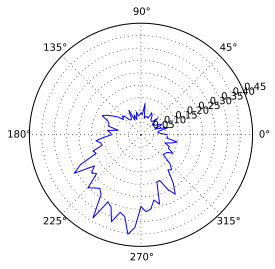

In [8]:
subplot(1,1,1,polar = True)
plot(bins,hists[8])

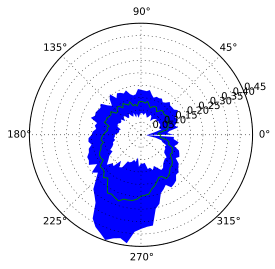

In [99]:
subplot(1,1,1,polar = True)
plot(bins,np.mean(hists,axis = 0))
ub = np.mean(hists,axis = 0)+np.std(hists,axis = 0)
lb = np.mean(hists,axis = 0)-np.std(hists,axis = 0)
fill_between(bins,ub,lb,lw = 0)
plot(bins,np.mean(hists,axis = 0))
savefig('spos_group.pdf')

In [100]:
shape(hists)

(15, 96)

In [9]:
idx = find(np.array(muscle_sigs['muscles']) == 'b1')[0]
sig = np.array(muscle_sigs['fits'][idx])

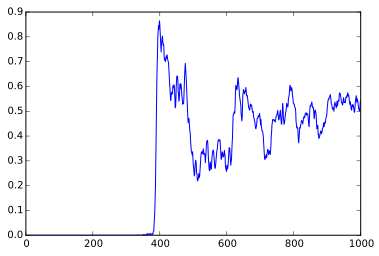

In [26]:
testsig = sig[0:1000]
plot(testsig)

In [27]:
import pyfnnd

In [92]:
n_best, c_best, LL, theta_best = pyfnnd.deconvolve(testsig,dt = 0.021,verbosity=1,learn_theta=(None, None, None, None, None),
    spikes_tol=1E-6, params_tol=1E-6,rate = 500,tau = 2.0)

Completed: 00:00.1


In [93]:
from scipy.signal import find_peaks_cwt
idxs = find_peaks_cwt(n_best,np.arange(1,2))

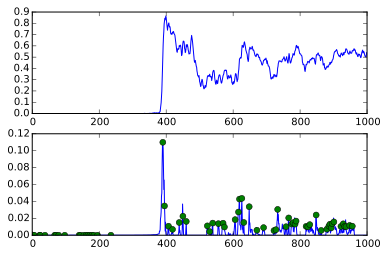

In [94]:
subplot(2,1,1)
plot(testsig[:1000])
subplot(2,1,2)
plot(n_best[:1000])
plot(idxs[:100],n_best[idxs[:100]],'o')